In [60]:
import time

from pysinewave import SineWave

import serial

import numpy as np
import math

%matplotlib widget
import matplotlib.pyplot as plt

Search for COM-Ports and list them

In [48]:
import subprocess
cmd = "python -m serial.tools.list_ports"
p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
for line in p.stdout.readlines():
    print(line.decode("UTF-8").rstrip("\n"))

COM7                
1 ports found




Connect to COM-Port

In [52]:
if(ser):
    ser.close()
ser = serial.Serial("COM7", 9600, timeout = 1)

#get firmware version
ser.write(b'*idn?\n')
ver=ser.readline().decode("UTF-8")

print(ser.name + " , " + str(ser.is_open) + " , " + ver)

COM7 , True , CONRAD,DSO 4022,BK147048, V1.23



Generate a Sinwave with the headphone port,
measure its frequency and amplitude,
increase the frequency and repeat:

In [67]:
points = []

sinewave = SineWave()
sinewave.play()

for frequency in range(0, 6000, 10):
    sinewave.set_frequency(frequency)
    ser.write(b':meas:sour 1\n')
    ser.write(b':meas:freq?\n')
    freq = ser.readline().decode("UTF-8").rstrip("\n")
    ser.write(b':meas:vamp?\n')
    amp = ser.readline().decode("UTF-8").rstrip("\n")
    if(freq != "  ?" and amp != "  ?"):
        points.append([float(freq), float(amp)])

sinewave.stop()

Plot those values:

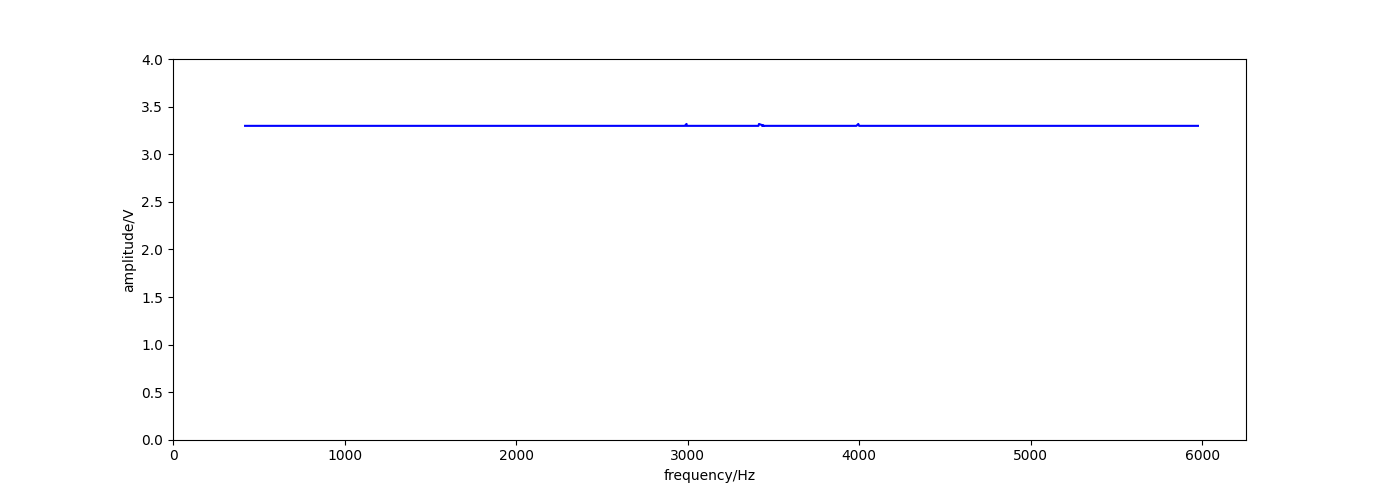

In [70]:
plt.clf()

x, y = np.array(points).T
plt.plot(x, y, 'b-')

plt.xlabel("frequency/Hz")
plt.ylabel("amplitude/V")
plt.gca().set_xlim([0,None])
plt.gca().set_ylim([0,math.ceil(max(y))]) #y axis from 0 to next int of highest number

plt.show()